In [1]:
from SpectrumAnalysis.io import process_data_zip, show_fits_info
project_data_filename = 'Noise_process.fits'

In [3]:
process_data_zip(project_data_filename)

HDU 'REF1' already exists. Skipping...
HDU 'SAMPLE1' already exists. Skipping...
HDU 'REF2' already exists. Skipping...
HDU 'SAMPLE2' already exists. Skipping...
------------------------------
Please select the FITS file to add as HDU 'REF3':
Press the index number to choose the file to read into the hdu
Press 's' to skip adding this hdu
Press 'n' to read the next zip file
Press 'e' to end the whole process
0: preprocessed_data\Background_Noise.fits
1: preprocessed_data\Polarizer_35deg_THz_pulse_Aperture.fits
2: preprocessed_data\THz_pulse_Aperture.fits
You selected: preprocessed_data\Background_Noise.fits
HDU 'REF3' added successfully.
------------------------------
Please select the FITS file to add as HDU 'SAMPLE3':
Press the index number to choose the file to read into the hdu
Press 's' to skip adding this hdu
Press 'n' to read the next zip file
Press 'e' to end the whole process
0: preprocessed_data\Background_Noise.fits
1: preprocessed_data\Polarizer_35deg_THz_pulse_Aperture.fits

In [4]:
show_fits_info(project_data_filename)

Filename: Noise_process.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  REF1          1 ImageHDU        21   (51, 500, 1)   float64   
  2  SAMPLE1       1 ImageHDU        21   (51, 500, 1)   float64   
  3  REF2          1 ImageHDU        21   (51, 500, 1)   float64   
  4  SAMPLE2       1 ImageHDU        21   (51, 500, 1)   float64   
  5  REF3          1 ImageHDU        21   (51, 500, 1)   float64   
  6  SAMPLE3       1 ImageHDU        21   (26, 500, 1)   float64   
------------------------------
HDU id: REF1
Background_Noise
Data shape: (1, 500, 51)
------------------------------
HDU id: SAMPLE1
Polarizer_35deg_THz_pulse_Aperture
Data shape: (1, 500, 51)
------------------------------
HDU id: REF2
Background_Noise
Data shape: (1, 500, 51)
------------------------------
HDU id: SAMPLE2
Polarizer_35deg_THz_pulse_Aperture_humid
Data shape: (1, 500, 51)
------------------------------
HDU id: REF3
Background_Noi

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_avg_std_from_fits(fits_file):
    metadata = load_data_from_fits(fits_file)
    
    time = metadata[1]['data'][:, 0]
    E_field = [metadata[key]['data'][:, 1] for key in metadata]
    
    # Time-domain average and std
    E_field_stack = np.stack(E_field)
    E_field_avg = np.mean(E_field_stack, axis=0)
    E_field_std = np.std(E_field_stack, axis=0)

    # Plot time-domain data
    plt.figure(figsize=(10, 4))
    plt.plot(time, E_field_avg, label='Average E-field')
    plt.fill_between(time, E_field_avg - E_field_std, E_field_avg + E_field_std, alpha=0.2, label='Standard Deviation')
    plt.xlabel('Time (ps)')
    plt.ylabel('E-field (arb. units)')
    plt.title('E-field time-domain data')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # FFT computation
    fft_all = [np.abs(np.fft.fft(e)) for e in E_field]
    fft_stack = np.stack(fft_all)
    fft_avg = np.mean(fft_stack, axis=0)
    fft_std = np.std(fft_stack, axis=0)

    freqs = np.fft.fftfreq(len(time), d=(time[1] - time[0]))  # Frequency axis

    # Plot frequency-domain data
    plt.figure(figsize=(10, 4))
    plt.plot(freqs, fft_avg, label='Average FFT')
    plt.fill_between(freqs, fft_avg - fft_std, fft_avg + fft_std, alpha=0.2, label='FFT Std Dev')
    plt.xlabel('Frequency (THz)')
    plt.ylabel('Amplitude (arb. units)')
    plt.title('FFT of E-field')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    return E_field_avg, E_field_std, fft_avg, fft_std, freqs

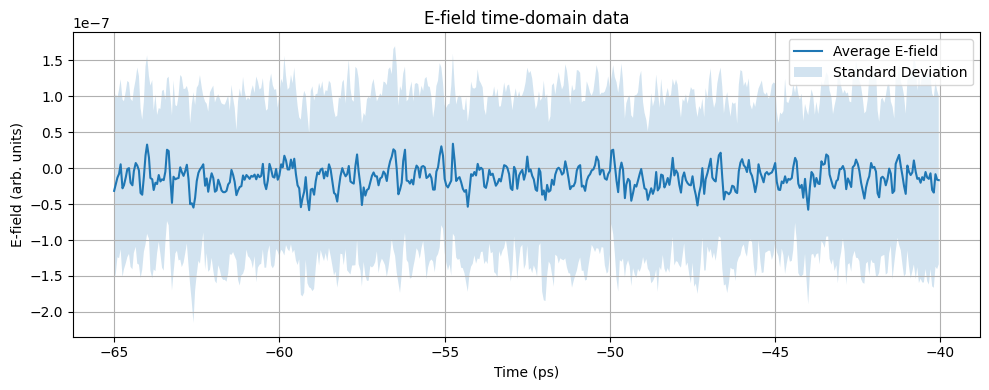

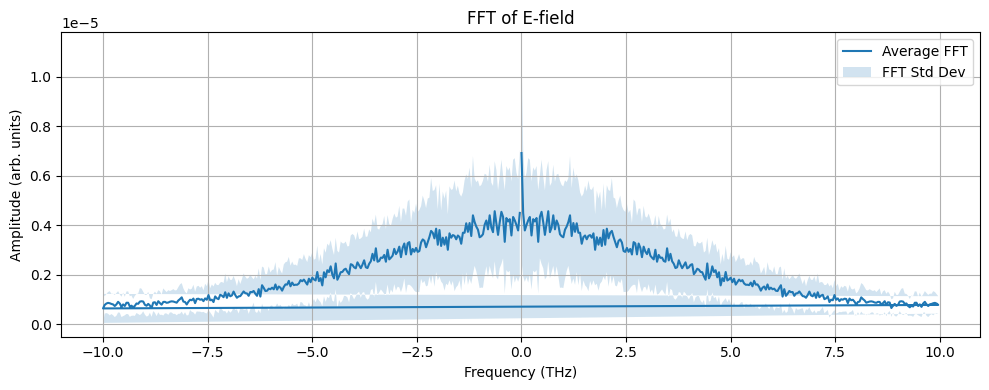

In [45]:
background_avg, background_std, bnd_fft_avg, bnd_fft_std, bnd_freqs =  plot_avg_std_from_fits('./Background_Noise.fits')

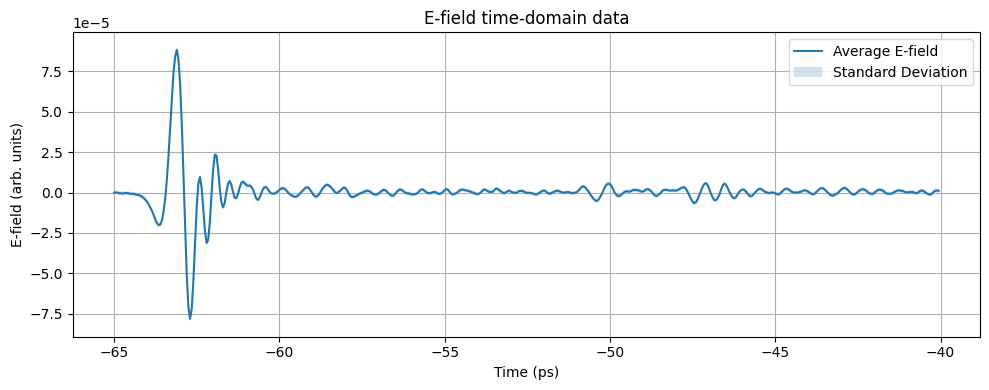

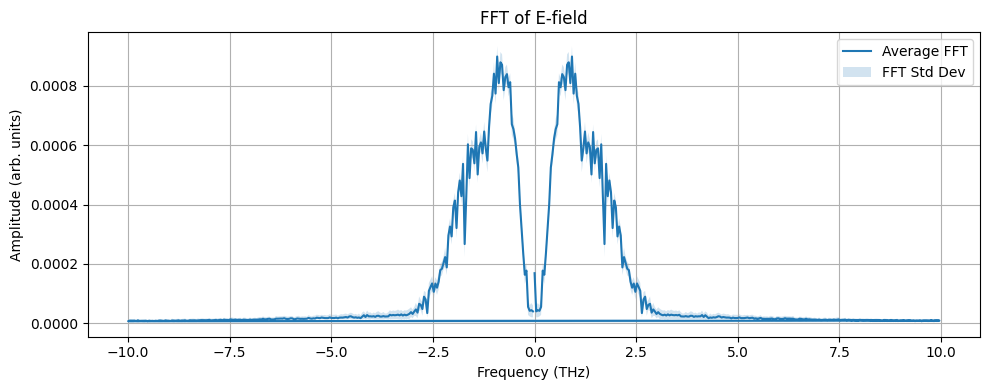

In [46]:
thz_avg, thz_std, thz_fft_avg, thz_fft_std, thz_freqs  =  plot_avg_std_from_fits('./Polarizer_35deg_THz_pulse_Aperture.fits')

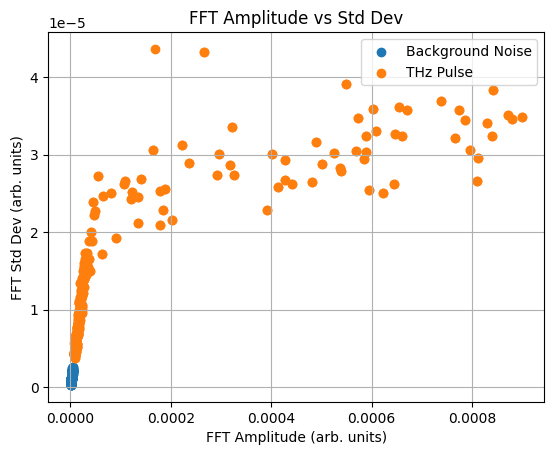

In [50]:
plt.scatter((bnd_fft_avg), bnd_fft_std, label='Background Noise')
plt.scatter(np.abs(thz_fft_avg), thz_fft_std, label='THz Pulse')
plt.xlabel('FFT Amplitude (arb. units)')
plt.ylabel('FFT Std Dev (arb. units)')
plt.title('FFT Amplitude vs Std Dev')
plt.legend()
plt.grid()      
